In [1]:
%load_ext autoreload
%autoreload 2

### test QE analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvcircuit as pvc
import ipywidgets as widgets
%matplotlib widget

Tandems version 0.989
Data path is:  /Users/jgeisz/opt/anaconda3/envs/pvdev/lib/python3.9/site-packages/tandems/data/


In [3]:
path = pvc.datapath
file = 'WB417n6_C_EQE.csv'
dfEQE = pd.read_csv(path+file, index_col=0)
EQE = dfEQE.to_numpy(dtype=np.float64, copy=True)
nm = dfEQE.index.to_numpy(dtype=np.float64, copy=True)

#qe imports 3 ref spectra
df = pvc.qe.dfrefspec
wvl = pvc.qe.wvl
AM0 = pvc.qe.AM0
AM15G = pvc.qe.AM15G
AM15D = pvc.qe.AM15D

(0.0, 1.7)

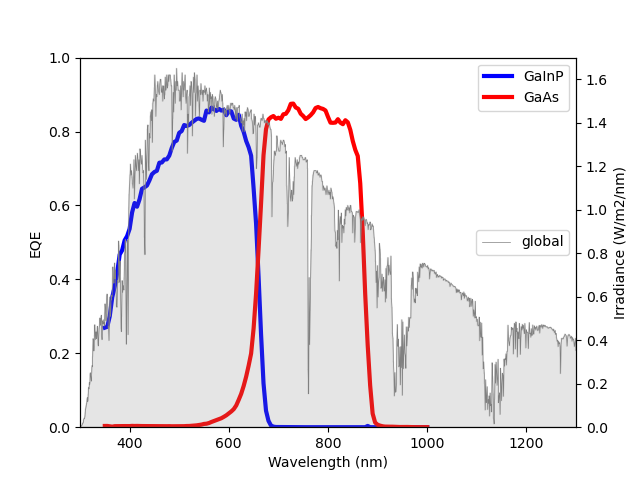

In [4]:
fig, ax = plt.subplots()
ax.plot(nm, EQE[:,0], c='blue', lw=3, marker='', label='GaInP')
ax.plot(nm, EQE[:,1], c='red', lw=3, marker='', label='GaAs')
ax.legend()
ax.set_ylim(0,1)
ax.set_xlim(300, 1300)
ax.set_ylabel('EQE')  # Add a y-label to the axes.
ax.set_xlabel('Wavelength (nm)')  # Add an x-label to the axes.

rax = ax.twinx() #right axis
#rax.plot(wvl, AM0, c='blue', lw=0.5, marker='', label='space')
rax.fill_between(wvl, AM15G, step="pre", alpha=0.2, color='grey')
rax.plot(wvl, AM15G, c='grey', lw=0.5, marker='', label='global')
#rax.plot(wvl, AM15D, c='red', lw=0.5, marker='', label='direct')
rax.legend(loc=7)
rax.set_ylabel('Irradiance (W/m2/nm)')  # Add a y-label to the axes.
rax.set_ylim(0, 1.7)

In [5]:
# integrate EQE to determine Jdb and Eg of each junction
Jdb, Eg = pvc.qe.JdbMD(EQE, nm, 25)
print(Jdb, Eg)
print('Jdb1={0:.5} A/cm2,  Jdb2={1:.5} A/cm2, Eg1={2:.4} eV, Eg2={3:.4} eV'.format(Jdb[0],Jdb[1],Eg[0],Eg[1]))

[3.491e-29 8.700e-22] [1.871 1.419]
Jdb1=3.4908e-29 A/cm2,  Jdb2=8.6995e-22 A/cm2, Eg1=1.871 eV, Eg2=1.419 eV


In [6]:
Jint = pvc.qe.JintMD(EQE, nm, pvc.qe.refspec)
Pint = pvc.qe.PintMD(pvc.qe.refspec)
#Jint = pvc.qe.JintMD(1, nm, pvc.qe.refspec)
print(Jint)
print(Pint)

[[16.327 14.187]
 [13.109 12.785]
 [11.404 11.708]]
[1348.043 1000.471  900.187]
